# Project: Fraud Detection 
**Topic:** Gradient Boosting (XGBoost) vs. Bagging (Random Forest)  

1.  **Random Forest (Bagging):** Trains 100 trees independently and takes a vote. (Stable, reliable).
2.  **XGBoost (Boosting):** Trains 100 trees in a sequence. Each new tree tries to fix the errors of the previous one. (Aggressive, high-performance).

**The Question:** Can XGBoost beat the Random Forest? Let's fight.

In [3]:
# You may need to install xgboost first: !pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Visual Style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## Data Loading

In [5]:
df = pd.read_csv("credit_card_fraud.csv")
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,Amount,Class
0,-5.217916,1.687729,0.369716,-4.366871,-1.952165,-1.046018,-0.255244,0.294051,-1.435278,-1.877757,-2.674147,0.474294,23.46,1
1,-0.511973,1.377574,0.488892,-1.287542,0.767918,0.950466,1.655454,0.008564,-0.614041,1.591987,-0.820218,1.334164,150.51,0
2,-1.571412,4.215085,0.483462,-1.596791,2.416115,0.034394,2.650530,2.962440,-1.700985,0.500058,1.775122,-0.487399,65.84,0
3,0.013499,-1.017276,-0.958744,0.290922,-0.932895,0.870139,1.363499,1.202917,-2.528307,0.438580,-1.521681,1.218724,45.65,0
4,0.982229,-0.856688,0.003643,0.168999,-2.541798,1.819981,1.214716,1.147831,-0.747506,-0.282548,-0.353127,0.613534,8.48,0


## ✂️ Step 2: Split the Data
We split the data into Training (80%) and Testing (20%).
Both models will see the *exact same* training data to ensure a fair fight.

In [6]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Split Successfully.")

Data Split Successfully.


## Round 1: Random Forest
**Strategy:** "The Committee."
It builds 100 trees in parallel. They don't talk to each other. They just vote.

In [9]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print(f"Random Forest Accuracy: {rf_acc:.4f}")

Random Forest Accuracy: 0.9690


## Round 2: XGBoost (Gradient Boosting)
**Strategy:** "The Specialist."
It builds trees one by one.
* Tree 1 tries to predict.
* Tree 2 looks at the *errors* of Tree 1 and fixes them.
* Tree 3 looks at the *errors* of Tree 2.

It learns from its mistakes.

In [10]:
# XGBoost requires no label encoding for binary classification usually, but it's good practice to be explicit
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
xgb_pred = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)

print(f"XGBoost Accuracy:      {xgb_acc:.4f}")

XGBoost Accuracy:      0.9740


## Step 3:the Winner
Let's visualize the accuracy difference.
In fraud detection, even a 1% improvement can save millions of dollars.

C:\Users\Admin\AppData\Local\Temp\ipykernel_11824\1425250350.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')


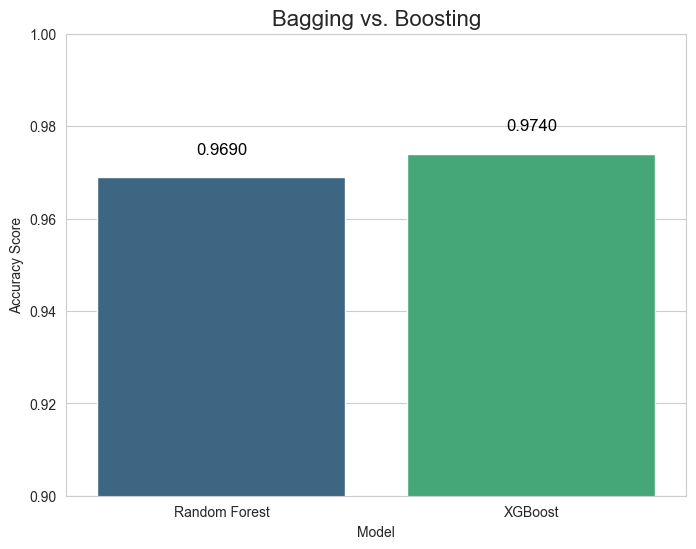

In [12]:
# Compare Accuracies
results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'Accuracy': [rf_acc, xgb_acc]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')
plt.ylim(0.90, 1.0) # Zoom in on the top 10%
plt.title('Bagging vs. Boosting', fontsize=16)
plt.ylabel('Accuracy Score')

for index, row in results.iterrows():
    plt.text(index, row.Accuracy + 0.005, f"{row.Accuracy:.4f}", color='black', ha="center", fontsize=12)

plt.show()

# Conclusion
The results show why **XGBoost** is the king of Kaggle competitions.

1.  **Random Forest** is great. It's stable, easy to use, and hard to break.
2.  **XGBoost** is aggressive. By sequentially fixing errors, it squeezed out that extra bit of accuracy.

**The Lesson:**
* Start with Random Forest (it's a great baseline).
* Switch to XGBoost when you need maximum performance and are willing to tune parameters.